In [1]:
from fastai.vision import *
from fastai.metrics import *

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
path = Path('wids')
path.ls()

[PosixPath('wids/sub2.csv'),
 PosixPath('wids/leaderboard_test_data'),
 PosixPath('wids/train_images.zip'),
 PosixPath('wids/train_images'),
 PosixPath('wids/leaderboard_holdout_data.zip'),
 PosixPath('wids/sub.csv'),
 PosixPath('wids/leaderboard_holdout_data'),
 PosixPath('wids/SampleSubmission.csv'),
 PosixPath('wids/sub1.csv'),
 PosixPath('wids/sub3.csv'),
 PosixPath('wids/leaderboard_test_data.zip'),
 PosixPath('wids/sub4.csv'),
 PosixPath('wids/models'),
 PosixPath('wids/traininglabels.csv')]

In [4]:
train = path/'train_images'
test = path/'leaderboard_test_data'
holdout = path/'leaderboard_holdout_data'
trainLabels = path/'traininglabels.csv'

In [5]:
df = pd.read_csv(path/'traininglabels.csv')
df.head()

,image_id,has_oilpalm,score
0,img_000002017.jpg,0,0.7895
1,img_000012017.jpg,0,1.0000
2,img_000022017.jpg,0,1.0000
3,img_000072017.jpg,0,1.0000
4,img_000082017.jpg,0,1.0000


In [7]:
len(df['has_oilpalm'])

15244

In [6]:
test = [t for t in test.iterdir()]
hold = [h for h in holdout.iterdir()]

In [ ]:
test

In [7]:
#tfms = get_transforms(flip_vert = True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
tfms = get_transforms()

In [ ]:
len(hold)

In [11]:
data = (ImageItemList.from_csv(path, 'traininglabels.csv', folder='train_images')
       .random_split_by_pct()
       .label_from_df('has_oilpalm')
       .transform(tfms, size=256)
       .add_test(test+hold)
       .databunch(bs=64).normalize(imagenet_stats))

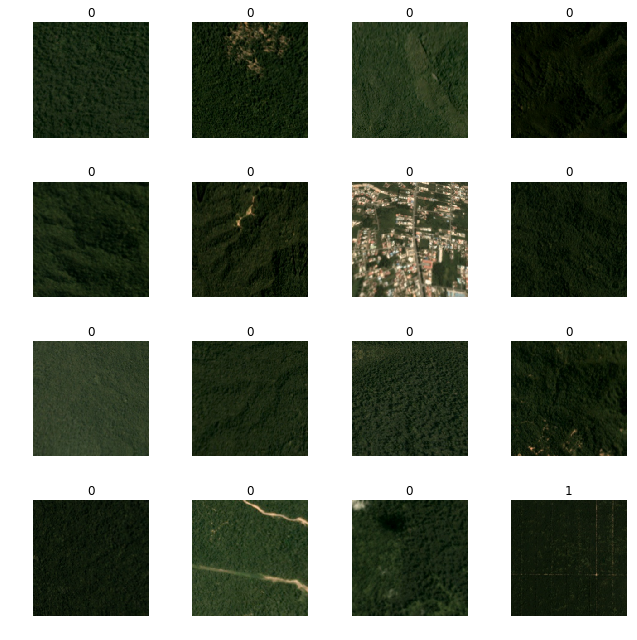

In [12]:
data.show_batch(4, figsize=(9, 9))

In [9]:
learn = create_cnn(data, models.resnet50, metrics=[accuracy])

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


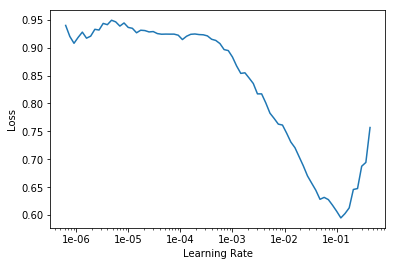

In [11]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, 1e-2)

epoch,train_loss,valid_loss,accuracy


In [ ]:
learn.fit_one_cycle(1, 1e-2)

In [ ]:
learn.save('iter-4-1', path)

In [ ]:
learn.fit_one_cycle(4, 1e-2)

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, 1e-6)

In [ ]:
learn.save('iter-3-2', path)

In [ ]:
learn.load('iter-3-2')

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()

In [ ]:
learn.load('iter-2-2')

In [ ]:
learn.fit_one_cycle(1, 1e-6)

In [ ]:
learn.save('iter-2-3', path)

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-3))

In [ ]:
learn.save('iter-2', path)

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, slice(1e-6, 1e-5/5))

In [ ]:
learn.save('iter-2-4', path)

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()
learn.unfreeze()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 1e-6)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 1e-5)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

In [ ]:
learn.save('iter-3',path)

In [ ]:
learn.unfreeze()

In [ ]:
data

In [ ]:
learn1 = create_cnn(data, models.resnet50, metrics=accuracy)
#learn1.fit_one_cycle(1)

In [ ]:
learn1.lr_find()

In [ ]:
learn1.recorder.plot()

In [ ]:
learn1.fit_one_cycle(4, slice(1e-2))

In [ ]:
learn.load('iter-3-2')

In [ ]:
p,t = learn.get_preds(ds_type=DatasetType.Test)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
p = to_np(p); p.shape

In [ ]:
print(t1) #learn.load('iter-2')

In [ ]:
ids = np.array([f.name for f in (test+hold)]);ids.shape

In [ ]:
sub = pd.DataFrame(np.stack([ids, p[:,1]], axis=1), columns=df_sample.columns)

In [ ]:
t1 = torch.tensor(roc_auc_score(targets, preds[:,1]))

In [ ]:
print(t1) #learn.unfreeze() and then train

In [ ]:
t2 = torch.tensor(roc_auc_score(targets, preds[:,1]))

In [ ]:
print(t2) ## learn.save('iter-1')

In [ ]:
interpret = ClassificationInterpretation.from_learner(learn)

In [ ]:
interpret.plot_top_losses(9, figsize=(7, 9))

In [ ]:
interpret.plot_confusion_matrix()

In [ ]:
interpret.plot_top_losses(20)

In [ ]:
sample = pd.read_csv(path/'SampleSubmission.csv')
sample.head()

In [ ]:
p,t = learn.get_preds(ds_type=DatasetType.Test)

In [ ]:
p = to_np(p); p.shape

In [ ]:
ids = np.array([f.name for f in (test+hold)]);ids.shape

In [ ]:
sub = pd.DataFrame(np.stack([ids, p[:,1]], axis=1), columns=sample.columns)


In [ ]:
sub.to_csv(path/'sub4.csv', index=False)

In [ ]:
!pwd

In [ ]:
!kaggle competitions submit -c widsdatathon2019 -f {path/'sub4.csv'} -m "Fourth Submission"

In [ ]:
print(preds.shape)

In [ ]:
preds = to_np(preds)

In [ ]:
ids = [f.name for f in (test+hold)]

In [ ]:
print(len(ids))

In [ ]:
ids = np.array(ids)

In [ ]:
ids.shape; type(ids)

In [ ]:
data = np.stack([ids, preds[:,1]], axis=1)

In [ ]:
columns = sample.columns
print(columns)

In [ ]:
res = pd.DataFrame(data, columns)

In [ ]:
print(ids.shape)

In [ ]:
print(columns.shape)